# Lab 4

## Ex 1

In [14]:
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




### Point 1.a

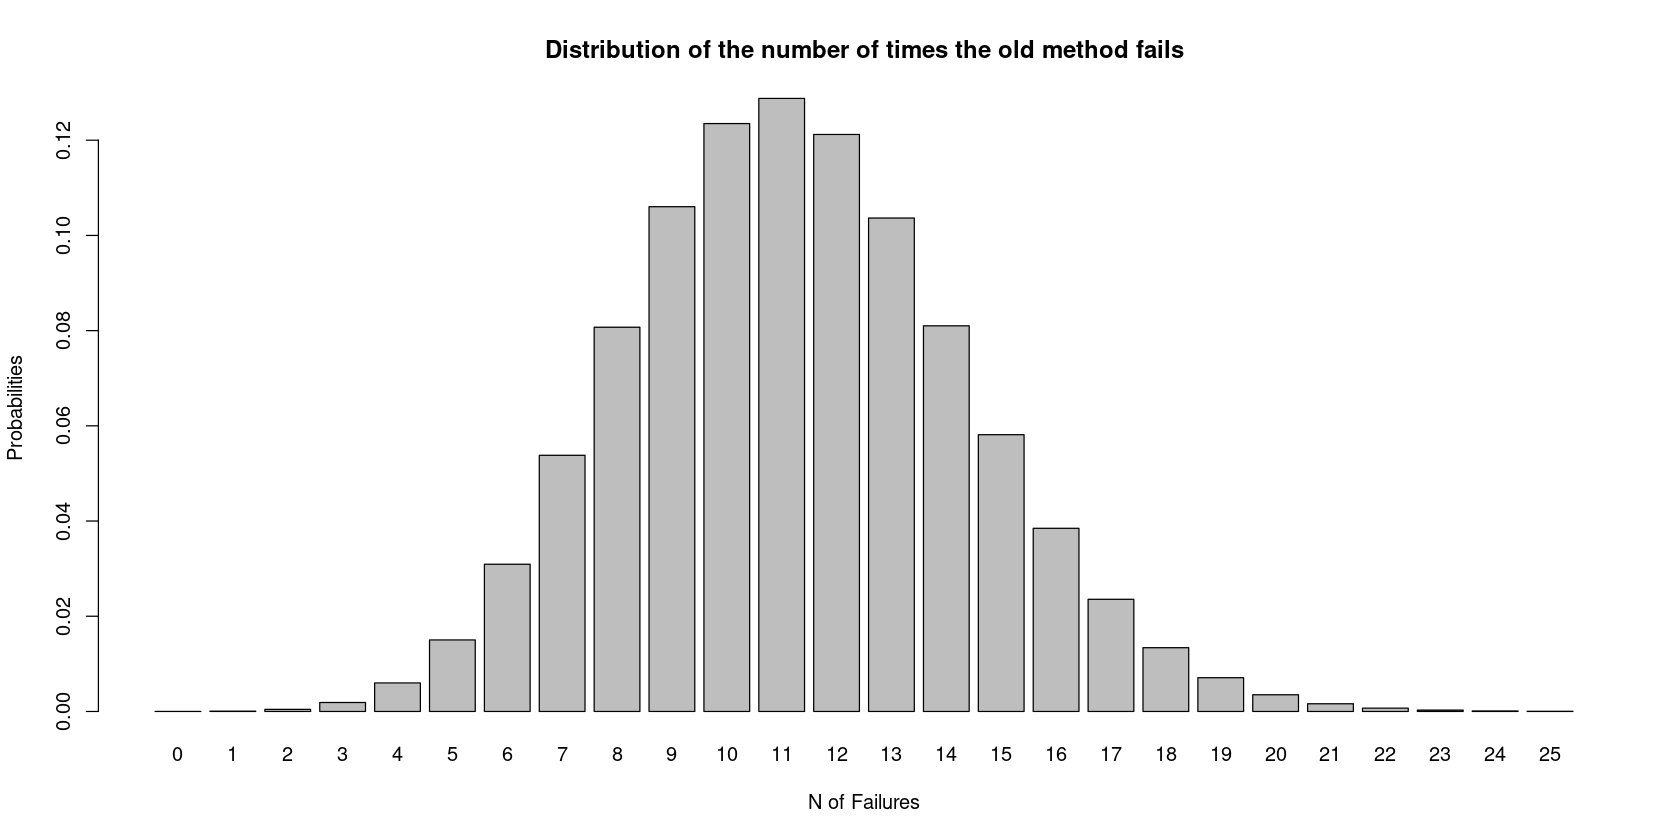

In [48]:
n<- 75
p<- 15/100
x<- 0:25
y<- dbinom(x,n,p)
barplot(y,
        names=x,
        main="Distribution of the number of times the old method fails",
        xlab= "N of Failures",
        ylab= "Probabilities")
     

### Point 1.b

If we follow a frequentist approach we ge $p_{fail}=\frac{y}{n}=\frac{6}{75}=0.08$

### Point 1.c

## Ex2

### Point 2.a

In [25]:
# data
data<-c(4.09, 4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 4.78,
4.79, 4.49, 5.85, 5.09, 2.40, 6.27, 6.30, 4.47)
n<-length(data)
var_th<-4
mu<-seq(0.01,10,0.01)

In [26]:
step_function <- function(value) {
  ifelse(0 < value & value <= 3, value,
         ifelse(3 < value & value <= 5, 3,
                ifelse(5 < value & value <= 8, 8 - value,
                       ifelse(value > 8, 0, NA))))
}

# calculate posterior
prior <- step_function(mu)/(sum(step_function(mu)))
original_prior<-prior
for (i in 1:n){
       likelihood <- dnorm(data[i],mean = mu,sd = sqrt(var_th))/sum(dnorm(data[i],mean = mu,sd = sqrt(var_th)))
       norm <- sum(prior*likelihood)
       posterior <- prior*likelihood/norm
       prior <- posterior
}

In [38]:
mean<-wtd.mean(mu,posterior)
std<-sqrt(wtd.var(mu,posterior,normwt=TRUE))

cat("The posterior mean is: ",wtd.mean(mu,posterior))
cat("\nThe posterior standard deviation is: ",sqrt(wtd.var(mu,posterior,normwt = TRUE)))

The posterior mean is:  4.725188
The posterior standard deviation is:  0.4852065

### Point 2.b

In [30]:
cumsum<-cumsum(posterior)
start<-mu[which.min(abs(cumsum-0.025))]
end<-mu[which.min(abs(cumsum-0.975))]
cat("The interval of 95% credibility is: ", start,"-",end)

The interval of 95% credibility is:  3.76 - 5.66

### Point 2.c

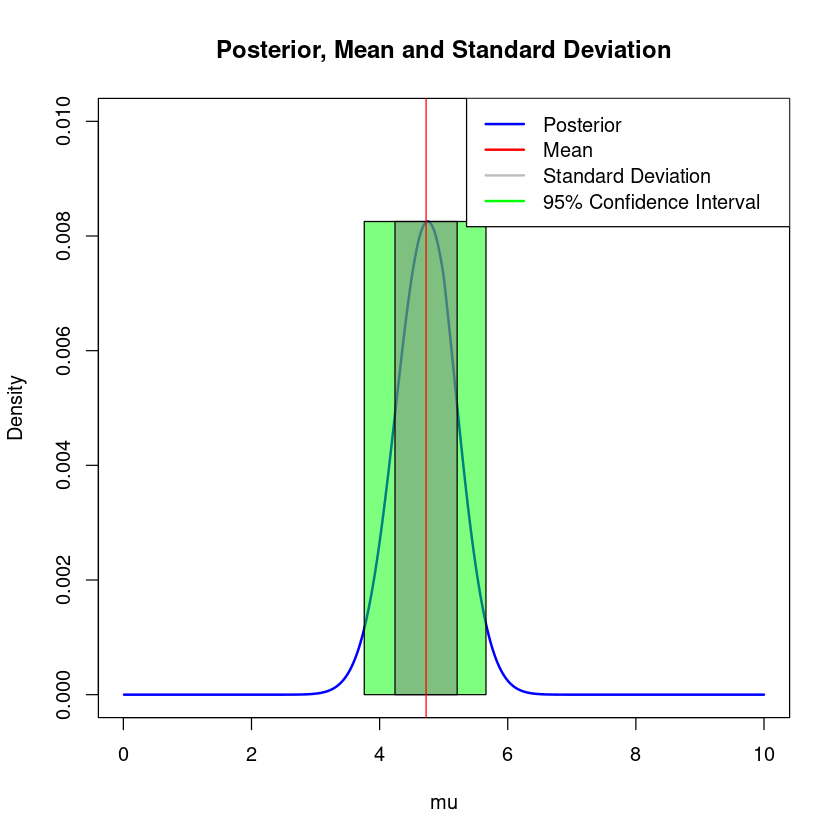

In [40]:
plot(mu, posterior, type = "l", col = "blue", lwd = 2, xlab = "mu", ylab = "Density", main =  "Posterior, Mean and Standard Deviation",ylim = c(0, 0.01))
rect(col= rgb(0,1.0,0,alpha=0.5),xleft = start,xright = end,ybottom = 0,ytop = posterior[which.max(posterior)])
rect(col= rgb(0.5,0.5,0.5,alpha=0.5),xleft = mean-std,xright =mean+std,ybottom = 0,ytop = posterior[which.max(posterior)])
abline(v=mean,col="red")
legend("topright", legend = c("Posterior", "Mean", "Standard Deviation", "95% Confidence Interval"), col = c("blue", "red", "grey", "green"), lwd = 2)

### Point 2.d

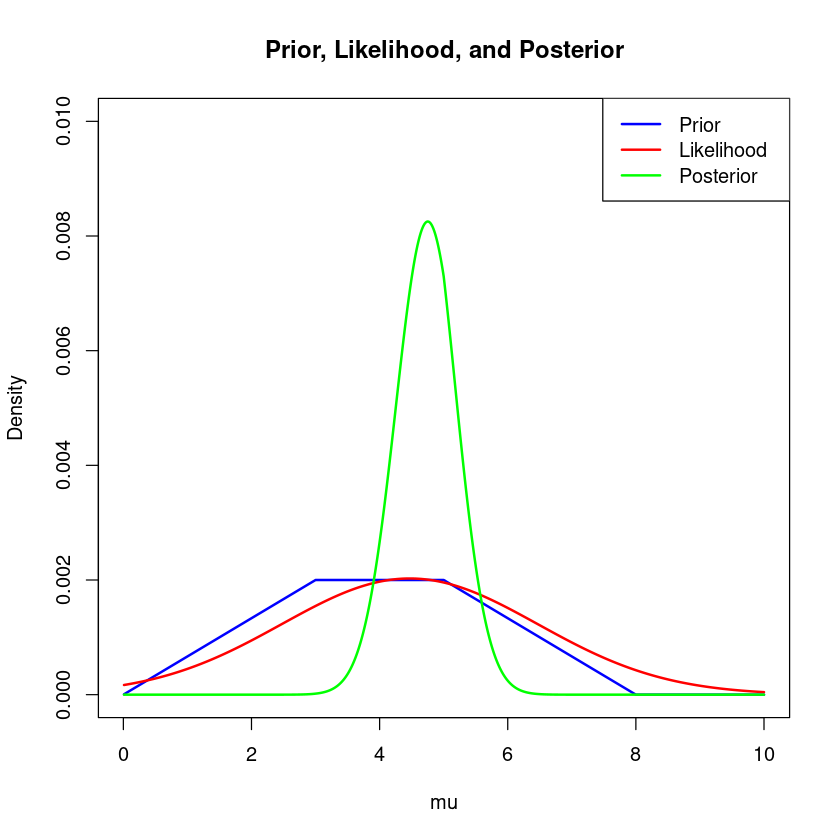

In [41]:
#plotting uniform prior and posterior
plot(mu, original_prior, type = "l", col = "blue", lwd = 2, xlab = "mu", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.01))
lines(mu, likelihood, col = "red", lwd = 2)
lines(mu, posterior, col = "green", lwd = 2)
legend("topright", legend = c("Prior", "Likelihood", "Posterior"), col = c("blue", "red", "green"), lwd = 2)

## Ex 3

In [ ]:
simulate <- function(n=50,prior=c(1/6,1/6,1/6,1/6,1/6,1/6),prob=c(5/5,4/5,3/5,2/5,1/5,0/5),box_num="rand"){
    if (box_num=="rand"){
        box_num <- sample(1:length(prior),1)  #choose a box
    }
    obs<-rbinom(n=n,size=1,prob = prob[box_num])
    for (o in obs){
        likelihood<-dbinom(x = o,size = ,prob = prob)
        norm<-sum(likelihood*prior)
        posterior<-prior*likelihood/norm
        prior<-posterior
    }
}

### Point 3.a